In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',50)

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
print(test.shape)
print(train.shape)

(4277, 13)
(8693, 14)


In [4]:
test['model'] = 'test'
train['model'] = 'train'


In [5]:
train.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,model
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,train
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,train


In [6]:
df = pd.concat([train,test])

In [7]:
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,model
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,train
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,train


In [8]:
# Since passengerid and name are unique, i am removing one of these columns

In [9]:
df.drop(columns = 'Name',inplace = True)

In [10]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'model'],
      dtype='object')

In [11]:
df.PassengerId.nunique()

12970

In [12]:
df.Cabin.dtype

dtype('O')

In [13]:
import re

def deck(digit):
    if isinstance(digit, str):
        matches = re.findall(r'\w+', digit)
        if matches:  # Check if any matches were found
            return matches[0]
        else:
            return np.nan
    else:
        return np.nan

df['cabin_deck'] = df['Cabin'].apply(deck)


def num(number):
    if isinstance(number,str):
        matches = re.findall(r'\w+',number)
        if matches:
            return matches[1]
        else:
            return np.nan
    else:
        return np.nan
df['cabin_num'] = df['Cabin'].apply(num)

def side(side):
    if isinstance(side,str):
        matches = re.findall(r'\w+',side)
        if matches:
            return matches[2]
        else:
            return np.nan
    else:
        return np.nan
df['cabin_side'] = df['Cabin'].apply(side)


In [14]:
df.drop(columns = 'Cabin',inplace = True)

In [15]:
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,model,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,train,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,train,F,0,S


In [16]:
df.cabin_num.value_counts()

82      34
4       28
56      28
95      27
31      27
        ..
1848     1
1847     1
1846     1
1844     1
1890     1
Name: cabin_num, Length: 1894, dtype: int64

In [17]:
df.shape

(12970, 16)

In [18]:
df.cabin_side.value_counts()

S    6381
P    6290
Name: cabin_side, dtype: int64

In [19]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
model              0
cabin_deck       299
cabin_num        299
cabin_side       299
dtype: int64

In [20]:
(df.isnull().sum()/df.shape[0])*100

PassengerId      0.000000
HomePlanet       2.220509
CryoSleep        2.390131
Destination      2.112567
Age              2.081727
VIP              2.282190
RoomService      2.027756
FoodCourt        2.228219
ShoppingMall     2.359291
Spa              2.189668
VRDeck           2.066307
Transported     32.976099
model            0.000000
cabin_deck       2.305320
cabin_num        2.305320
cabin_side       2.305320
dtype: float64

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  object 
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  Transported   8693 non-null   object 
 12  model         12970 non-null  object 
 13  cabin_deck    12671 non-null  object 
 14  cabin_num     12671 non-null  object 
 15  cabin_size    12671 non-null  object 
 16  cabin_side    12671 non-null  object 
dtypes: float64(6), object(11)
memory usage: 2.3+ MB


In [21]:
df1 = df.copy()

In [22]:
# NULL VALUES
# HomePlanet, CryoSleep, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, cabin_deck, cabin_num,
# , cabin_side

In [23]:
#Object
df1['HomePlanet'] = df1['HomePlanet'].fillna(df1['HomePlanet'].mode()[0])
df1['CryoSleep'] = df1['CryoSleep'].fillna(df1['CryoSleep'].mode()[0])
df1['Destination'] = df1['Destination'].fillna(df1['Destination'].mode()[0])
df1['VIP'] = df1['VIP'].fillna(df1['VIP'].mode()[0])
df1['cabin_deck'] = df1['cabin_deck'].fillna(df1['cabin_deck'].mode()[0])
df1['cabin_num'] = df1['cabin_num'].fillna(df1['cabin_num'].mode()[0])
df1['cabin_side'] = df1['cabin_side'].fillna(df1['cabin_side'].mode()[0])

In [24]:
# Numerical
df1['Age'] = df1['Age'].fillna(df1['Age'].median())
df1['RoomService'] = df1['RoomService'].fillna(df1['RoomService'].median())
df1['FoodCourt'] = df1['FoodCourt'].fillna(df1['FoodCourt'].median())
df1['ShoppingMall'] = df1['ShoppingMall'].fillna(df1['ShoppingMall'].median())
df1['Spa'] = df1['Spa'].fillna(df1['Spa'].median())
df1['VRDeck'] = df1['VRDeck'].fillna(df1['VRDeck'].median())

In [25]:
df1.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported     4277
model              0
cabin_deck         0
cabin_num          0
cabin_side         0
dtype: int64

In [26]:
len(df1[df['Age'] == 0])

260

In [27]:
#Age can be zero, so replace 0 with the median
age = np.where(df1['Age'] == 0,df['Age'].median(),df1['Age'])
df1['Age'] = age

In [28]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,model,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,train,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,train,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,train,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,train,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,train,F,1,S


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12970 non-null  object 
 2   CryoSleep     12970 non-null  bool   
 3   Destination   12970 non-null  object 
 4   Age           12970 non-null  float64
 5   VIP           12970 non-null  bool   
 6   RoomService   12970 non-null  float64
 7   FoodCourt     12970 non-null  float64
 8   ShoppingMall  12970 non-null  float64
 9   Spa           12970 non-null  float64
 10  VRDeck        12970 non-null  float64
 11  Transported   8693 non-null   object 
 12  model         12970 non-null  object 
 13  cabin_deck    12970 non-null  object 
 14  cabin_num     12970 non-null  object 
 15  cabin_side    12970 non-null  object 
dtypes: bool(2), float64(6), object(8)
memory usage: 1.5+ MB


In [30]:
total = df1['RoomService'] + df1['FoodCourt'] + df1['ShoppingMall'] + df1['Spa'] + df1['VRDeck']
df1['total_billed_amt'] = total
df1.head(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,model,cabin_deck,cabin_num,cabin_side,total_billed_amt
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,train,B,0,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,train,F,0,S,736.0


In [31]:
df1['total_billed_amt'].value_counts()

0.0       5457
809.0       76
788.0       56
803.0       51
804.0       50
          ... 
3606.0       1
7862.0       1
5075.0       1
4519.0       1
5478.0       1
Name: total_billed_amt, Length: 2980, dtype: int64

In [32]:
df1.drop(columns = ['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],inplace = True)

In [33]:
df1.shape

(12970, 12)

## Encoding

In [34]:
# Object dtype ---- HomePlanet, CryoSleep, Destination, VIP, cabin_deck, cabin_num, cabin_side

# Onehot Encoder - HomePlanet, Destination, cabin_deck
# Label Encoder - CryoSleep, VIP, cabin_side
# Ordinal Encoding - 

In [35]:
df1['cabin_num'] = pd.to_numeric(df1['cabin_num'])

In [36]:
df2 = df1.copy()


In [37]:
def label(num):
    if num == False:
        return 0
    else:
        return 1
df2['CryoSleep'] = df1['CryoSleep'].apply(label)
    

In [38]:
df2['VIP'] = df2['VIP'].apply(label)

In [39]:
def cabin(num):
    if num == 'S':
        return 0
    else:
        return 1
df2['cabin_side'] = df1['cabin_side'].apply(cabin)

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       12970 non-null  object 
 1   HomePlanet        12970 non-null  object 
 2   CryoSleep         12970 non-null  int64  
 3   Destination       12970 non-null  object 
 4   Age               12970 non-null  float64
 5   VIP               12970 non-null  int64  
 6   Transported       8693 non-null   object 
 7   model             12970 non-null  object 
 8   cabin_deck        12970 non-null  object 
 9   cabin_num         12970 non-null  int64  
 10  cabin_side        12970 non-null  int64  
 11  total_billed_amt  12970 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 1.3+ MB


In [41]:
#Onehot Encoding
dummies = pd.get_dummies(data = df2[['HomePlanet','Destination','cabin_deck']],drop_first=True,
                         prefix = ['HomePlanet','Destination','cabin_deck'],
                         columns = ['HomePlanet','Destination','cabin_deck'])
dummies

,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T
0,1,0,0,1,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4272,0,0,0,1,0,0,0,0,0,1,0
4273,0,0,0,1,0,0,0,0,1,0,0
4274,0,1,0,0,0,0,1,0,0,0,0
4275,1,0,0,1,0,0,1,0,0,0,0


In [42]:
print(dummies.shape)
print(df2.shape)

(12970, 11)
(12970, 12)


In [43]:
new_df = pd.concat([df2,dummies], axis = 1)
new_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,model,cabin_deck,cabin_num,cabin_side,total_billed_amt,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,False,train,B,0,1,0.0,1,0,0,1,1,0,0,0,0,0,0
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,True,train,F,0,0,736.0,0,0,0,1,0,0,0,0,1,0,0


In [44]:
new_df.drop(columns = ['HomePlanet','Destination','cabin_deck'],inplace = True)

In [45]:
new_df.head(2)

,PassengerId,CryoSleep,Age,VIP,Transported,model,cabin_num,cabin_side,total_billed_amt,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T
0,0001_01,0,39.0,0,False,train,0,1,0.0,1,0,0,1,1,0,0,0,0,0,0
1,0002_01,0,24.0,0,True,train,0,0,736.0,0,0,0,1,0,0,0,0,1,0,0


In [46]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                12970 non-null  object 
 1   CryoSleep                  12970 non-null  int64  
 2   Age                        12970 non-null  float64
 3   VIP                        12970 non-null  int64  
 4   Transported                8693 non-null   object 
 5   model                      12970 non-null  object 
 6   cabin_num                  12970 non-null  int64  
 7   cabin_side                 12970 non-null  int64  
 8   total_billed_amt           12970 non-null  float64
 9   HomePlanet_Europa          12970 non-null  uint8  
 10  HomePlanet_Mars            12970 non-null  uint8  
 11  Destination_PSO J318.5-22  12970 non-null  uint8  
 12  Destination_TRAPPIST-1e    12970 non-null  uint8  
 13  cabin_deck_B               12970 non-null  uint

In [47]:
new_df.shape

(12970, 20)

In [48]:
df4 = new_df.iloc[:,1:]

In [49]:
df4.drop(columns = ['Transported','model'],inplace = True)

<Axes: >

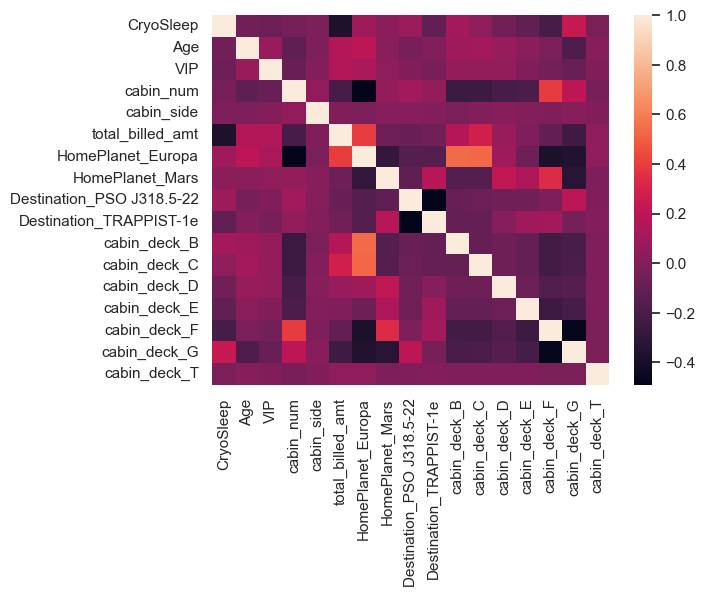

In [50]:
sns.heatmap(new_df.corr())

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Columns'] = df4.columns
vif['VIF'] = [variance_inflation_factor(df4.values, i) for i in range(df4.shape[1])]
vif

,Columns,VIF
0,CryoSleep,2.422558
1,Age,5.634228
2,VIP,1.076063
3,cabin_num,3.650190
4,cabin_side,1.926760
5,total_billed_amt,1.972849
6,HomePlanet_Europa,5.436912
7,HomePlanet_Mars,2.097338
8,Destination_PSO J318.5-22,1.586057
9,Destination_TRAPPIST-1e,4.723919


In [52]:
print(df4.shape)
#Removing cabin_deck_G column
df4.drop(columns = ['cabin_deck_G'],inplace = True)
print(df4.shape)

(12970, 17)
(12970, 16)


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Columns'] = df4.columns
vif['VIF'] = [variance_inflation_factor(df4.values, i) for i in range(df4.shape[1])]
vif

,Columns,VIF
0,CryoSleep,2.050273
1,Age,4.766278
2,VIP,1.075359
3,cabin_num,3.002962
4,cabin_side,1.860112
5,total_billed_amt,1.910793
6,HomePlanet_Europa,5.025377
7,HomePlanet_Mars,2.024200
8,Destination_PSO J318.5-22,1.415849
9,Destination_TRAPPIST-1e,3.634848


In [54]:
print(df4.shape)
#Removing cabin_deck_G column
df4.drop(columns = ['HomePlanet_Europa'],inplace = True)
print(df4.shape)

(12970, 16)
(12970, 15)


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Columns'] = df4.columns
vif['VIF'] = [variance_inflation_factor(df4.values, i) for i in range(df4.shape[1])]
vif

,Columns,VIF
0,CryoSleep,1.919721
1,Age,4.620129
2,VIP,1.066797
3,cabin_num,2.919626
4,cabin_side,1.859321
5,total_billed_amt,1.776819
6,HomePlanet_Mars,1.830182
7,Destination_PSO J318.5-22,1.392716
8,Destination_TRAPPIST-1e,3.624146
9,cabin_deck_B,1.446506


In [56]:
df4['VIP'].value_counts()

0    12697
1      273
Name: VIP, dtype: int64

In [57]:
df4.describe()

,CryoSleep,Age,VIP,cabin_num,cabin_side,total_billed_amt,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_T
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,0.353200,29.276330,0.021049,591.577332,0.484965,1433.221049,0.206939,0.091288,0.705089,0.087972,0.084965,0.055513,0.102005,0.349884,0.000848
std,0.477983,13.636778,0.143552,512.953469,0.499793,2807.369708,0.405127,0.288029,0.456020,0.283265,0.278841,0.228987,0.302666,0.476952,0.029111
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,156.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,409.000000,0.000000,716.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,37.000000,0.000000,992.000000,1.000000,1442.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,79.000000,1.000000,1894.000000,1.000000,35987.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
new_df.columns

Index(['PassengerId', 'CryoSleep', 'Age', 'VIP', 'Transported', 'model',
       'cabin_num', 'cabin_side', 'total_billed_amt', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'cabin_deck_B', 'cabin_deck_C',
       'cabin_deck_D', 'cabin_deck_E', 'cabin_deck_F', 'cabin_deck_G',
       'cabin_deck_T'],
      dtype='object')

In [59]:
print(new_df.shape)
print(df4.shape)

(12970, 20)
(12970, 15)


In [60]:
new_df

,PassengerId,CryoSleep,Age,VIP,Transported,model,cabin_num,cabin_side,total_billed_amt,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T
0,0001_01,0,39.0,0,False,train,0,1,0.0,1,0,0,1,1,0,0,0,0,0,0
1,0002_01,0,24.0,0,True,train,0,0,736.0,0,0,0,1,0,0,0,0,1,0,0
2,0003_01,0,58.0,1,False,train,0,0,10383.0,1,0,0,1,0,0,0,0,0,0,0
3,0003_02,0,33.0,0,False,train,0,0,5176.0,1,0,0,1,0,0,0,0,0,0,0
4,0004_01,0,16.0,0,True,train,1,0,1091.0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,34.0,0,NaN,test,1496,0,0.0,0,0,0,1,0,0,0,0,0,1,0
4273,9269_01,0,42.0,0,NaN,test,82,0,1018.0,0,0,0,1,0,0,0,0,1,0,0
4274,9271_01,1,27.0,0,NaN,test,296,1,0.0,0,1,0,0,0,0,1,0,0,0,0
4275,9273_01,0,27.0,0,NaN,test,297,1,3203.0,1,0,0,1,0,0,1,0,0,0,0


In [61]:
df4['Transported'] = new_df['Transported']
df4['model'] = new_df['model']

In [62]:
df4.head()

,CryoSleep,Age,VIP,cabin_num,cabin_side,total_billed_amt,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_T,Transported,model
0,0,39.0,0,0,1,0.0,0,0,1,1,0,0,0,0,0,False,train
1,0,24.0,0,0,0,736.0,0,0,1,0,0,0,0,1,0,True,train
2,0,58.0,1,0,0,10383.0,0,0,1,0,0,0,0,0,0,False,train
3,0,33.0,0,0,0,5176.0,0,0,1,0,0,0,0,0,0,False,train
4,0,16.0,0,1,0,1091.0,0,0,1,0,0,0,0,1,0,True,train


In [63]:
df5 = df4[df4['model'] == 'train']
df5.drop(columns = 'model',inplace = True)

In [64]:
print(df4.isnull().sum().sum())
print(df5.isnull().sum().sum())

4277
0


In [65]:
def label(num):
    if num == False:
        return 0
    else:
        return 1
df5['Transported'] = df5['Transported'].apply(label)   

In [66]:
df5['Transported'].value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

In [67]:
print(df5.shape)
df5 = df5[~(df5.duplicated())]
print(df5.shape)


(8693, 16)
(8660, 16)


## Deleting cabin_num to check the accuracy

In [68]:
df6 = df5.drop(columns = 'cabin_num')

## Deleting VIP column to check the accuracy

In [205]:
df6 = df5.drop(columns = 'VIP')

## Actual

In [69]:
from sklearn.preprocessing import StandardScaler
print(df5.shape)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df5.drop(columns = 'Transported'))
print(x_scaled.shape)


(8660, 16)
(8660, 15)


In [56]:
x_scaled

array([[-0.73277002,  0.70347579, -0.15306307, ..., -0.3347588 ,
        -0.72462937, -0.02398972],
       [-0.73277002, -0.3892342 , -0.15306307, ..., -0.3347588 ,
         1.38001583, -0.02398972],
       [-0.73277002,  2.08757512,  6.53325471, ..., -0.3347588 ,
        -0.72462937, -0.02398972],
       ...,
       [-0.73277002, -0.24353954, -0.15306307, ..., -0.3347588 ,
        -0.72462937, -0.02398972],
       [-0.73277002,  0.19354446, -0.15306307, ...,  2.98722547,
        -0.72462937, -0.02398972],
       [-0.73277002,  1.06771246, -0.15306307, ...,  2.98722547,
        -0.72462937, -0.02398972]])

In [70]:
y = df5['Transported']

In [71]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x_scaled,y, test_size = 0.30)

In [72]:
xTrain.shape

(6062, 15)

## Alternative

In [177]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df5.drop(columns = 'Transported'),y, test_size = 0.30)

In [178]:
from sklearn.preprocessing import StandardScaler
print(df5.shape)
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
print(xTrain.shape)

(8693, 16)
(6085, 15)


## Model Training

In [73]:
from sklearn.metrics import accuracy_score
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
md1 = lr.fit(xTrain,yTrain)
pred1 = md1.predict(xTest)
acc1 = accuracy_score(pred1,yTest)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
md2 = dt.fit(xTrain,yTrain)
pred2 = md2.predict(xTest)
acc2 = accuracy_score(pred2,yTest)

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
md3 = rf.fit(xTrain,yTrain)
pred3 = md3.predict(xTest)
acc3 = accuracy_score(pred3,yTest)

# Bagging Classifier
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier()
md4 = bg.fit(xTrain,yTrain)
pred4 = md4.predict(xTest)
acc4 = accuracy_score(pred4,yTest)

#SVM
from sklearn.svm import SVC

svm = SVC()
md5 = svm.fit(xTrain,yTrain)
pred5 = md5.predict(xTest)
acc5 = accuracy_score(pred5,yTest)

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
md6 = knn.fit(xTrain,yTrain)
pred6 = md6.predict(xTest)
acc6 = accuracy_score(pred6,yTest)


#BernouliNB
from sklearn.naive_bayes import GaussianNB, BernoulliNB
bnb = BernoulliNB(alpha = 5,fit_prior = False)
md7 = bnb.fit(xTrain,yTrain)
pred7 = bnb.predict(xTest)
acc7 = accuracy_score(pred7,yTest)


# Voting Classifier
from sklearn.ensemble import VotingClassifier


vc = VotingClassifier(estimators = [('lr',lr),('dt',dt),('rf',rf),('bg',bg),('svm',svm),('knn',knn),('bnb',bnb)])
md8 = vc.fit(xTrain,yTrain)
pred8 = md8.predict(xTest)
acc8 = accuracy_score(pred8,yTest)


In [74]:
#Train score
ac1 = accuracy_score(md1.predict(xTrain),yTrain)
ac2 = accuracy_score(md2.predict(xTrain),yTrain)
ac3 = accuracy_score(md3.predict(xTrain),yTrain)
ac4 = accuracy_score(md4.predict(xTrain),yTrain)
ac5 = accuracy_score(md5.predict(xTrain),yTrain)
ac6 = accuracy_score(md6.predict(xTrain),yTrain)
ac7 = accuracy_score(md7.predict(xTrain),yTrain)
ac8 = accuracy_score(md8.predict(xTrain),yTrain)


In [75]:
#Normal

l1 = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier' , 'Bagging Classifier', 'SVM', 'KNN','BernouliNB', 'Voting Classifier']
scorecard = pd.DataFrame(data = {"Models": l1,'Train_score':[ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8],'Test_score': [acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8]})
scorecard.set_index('Models',inplace = True)
scorecard

,Train_score,Test_score
Models,,
Logistic Regression,0.720719,0.730562
Decision Tree,0.999340,0.678599
Random Forest Classifier,0.999340,0.739800
Bagging Classifier,0.977235,0.742494
SVM,0.743979,0.744804
KNN,0.802870,0.720554
BernouliNB,0.724018,0.726713
Voting Classifier,0.873309,0.754042


In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9]
}

# Create a BaggingClassifier instance
bagging_classifier = BaggingClassifier(base_estimator= RandomForestClassifier(), random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=2, n_jobs=-1,verbose = True)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model on test data
best_classifier = grid_search.best_estimator_
test_predictions = best_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'max_features': 0.7, 'max_samples': 0.9, 'n_estimators': 100}
Test Accuracy: 0.7390300230946882


In [78]:
# {'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 200}
train_prediction = best_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_prediction)
print(train_accuracy)
print(test_accuracy)


0.9454387990762124
0.7390300230946882


In [76]:
# {'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 200}
train_prediction = best_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_prediction)
print(train_accuracy)
print(test_accuracy)


0.9497690531177829
0.7384526558891455


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 110,150,30],
    'max_depth': [None,1,3, 40],
    'min_samples_split': [10,20,25,30],
    'min_samples_leaf': [5, 2,3, 4]
}

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=2, n_jobs=-1,verbose=True)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model on test data
best_classifier = grid_search.best_estimator_
test_predictions = best_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)


Fitting 2 folds for each of 320 candidates, totalling 640 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 30}
Test Accuracy: 0.7401847575057737


In [74]:
# {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 30}
train_prediction = best_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_prediction)
print(train_accuracy)
print(test_accuracy)


0.836027713625866
0.7401847575057737


In [70]:
# {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 50}
train_prediction = best_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_prediction)
print(train_accuracy)
print(test_accuracy)


0.8208718244803695
0.74364896073903


In [65]:
# 'max_depth': [None, 10, 20],
train_prediction = best_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_prediction)
print(train_accuracy)
print(test_accuracy)


0.8592667436489607
0.74364896073903


In [225]:
#Without duplicated values

l1 = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier' , 'Bagging Classifier', 'SVM', 'KNN','BernouliNB', 'Voting Classifier']
scorecard = pd.DataFrame(data = {"Models": l1,'Train_score':[ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8],'Test_score': [acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8]})
scorecard.set_index('Models',inplace = True)
scorecard

,Train_score,Test_score
Models,,
Logistic Regression,0.724183,0.715166
Decision Tree,0.999340,0.670131
Random Forest Classifier,0.999340,0.743264
Bagging Classifier,0.975916,0.734026
SVM,0.745958,0.735181
KNN,0.801221,0.716705
BernouliNB,0.724843,0.724018
Voting Classifier,0.870340,0.744034


In [211]:
#Removed VIP column

l1 = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier' , 'Bagging Classifier', 'SVM', 'KNN','BernouliNB', 'Voting Classifier']
scorecard = pd.DataFrame(data = {"Models": l1,'Train_score':[ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8],'Test_score': [acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8]})
scorecard.set_index('Models',inplace = True)
scorecard

,Train_score,Test_score
Models,,
Logistic Regression,0.725062,0.721242
Decision Tree,0.999014,0.662193
Random Forest Classifier,0.999014,0.733512
Bagging Classifier,0.977650,0.721242
SVM,0.751027,0.728528
KNN,0.814297,0.723543
BernouliNB,0.728677,0.717791
Voting Classifier,0.873131,0.740798


In [188]:
#Scaling on all the data
l1 = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier' , 'Bagging Classifier', 'SVM', 'KNN','BernouliNB', 'Voting Classifier']
scorecard = pd.DataFrame(data = {"Models": l1,'Train_score':[ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8],'Test_score': [acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8]})
scorecard.set_index('Models',inplace = True)
scorecard

,Train_score,Test_score
Models,,
Logistic Regression,0.726541,0.725460
Decision Tree,0.998850,0.674463
Random Forest Classifier,0.998850,0.735813
Bagging Classifier,0.975185,0.734279
SVM,0.745768,0.741564
KNN,0.809039,0.712040
BernouliNB,0.722761,0.729294
Voting Classifier,0.870008,0.746549


In [197]:
#After droping cabin_num column
l1 = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier' , 'Bagging Classifier', 'SVM', 'KNN','BernouliNB', 'Voting Classifier']
scorecard = pd.DataFrame(data = {"Models": l1,'Train_score':[ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8],'Test_score': [acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8]})
scorecard.set_index('Models',inplace = True)
scorecard

,Train_score,Test_score
Models,,
Logistic Regression,0.723583,0.724310
Decision Tree,0.944782,0.677531
Random Forest Classifier,0.944782,0.712423
Bagging Classifier,0.924076,0.705905
SVM,0.742646,0.743482
KNN,0.789154,0.715107
BernouliNB,0.725719,0.726610
Voting Classifier,0.838291,0.738880


In [181]:
# Scaling only in training data

l1 = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier' , 'Bagging Classifier', 'SVM', 'KNN','BernouliNB', 'Voting Classifier']
scorecard = pd.DataFrame(data = {"Models": l1,'Train_score':[ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8],'Test_score': [acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8]})
scorecard.set_index('Models',inplace = True)
scorecard

,Train_score,Test_score
Models,,
Logistic Regression,0.726541,0.677531
Decision Tree,0.999507,0.535276
Random Forest Classifier,0.999507,0.565951
Bagging Classifier,0.976007,0.417178
SVM,0.749055,0.513037
KNN,0.811997,0.517255
BernouliNB,0.731142,0.712423
Voting Classifier,0.870666,0.662960


In [151]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  12970 non-null  int64  
 1   Age                        12970 non-null  float64
 2   VIP                        12970 non-null  int64  
 3   cabin_num                  12970 non-null  int64  
 4   cabin_side                 12970 non-null  int64  
 5   total_billed_amt           12970 non-null  float64
 6   HomePlanet_Mars            12970 non-null  uint8  
 7   Destination_PSO J318.5-22  12970 non-null  uint8  
 8   Destination_TRAPPIST-1e    12970 non-null  uint8  
 9   cabin_deck_B               12970 non-null  uint8  
 10  cabin_deck_C               12970 non-null  uint8  
 11  cabin_deck_D               12970 non-null  uint8  
 12  cabin_deck_E               12970 non-null  uint8  
 13  cabin_deck_F               12970 non-null  uint

In [212]:
df4.duplicated().sum()

51

## DNN

In [230]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras import Sequential


model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim = 15))
model.add(BatchNormalization())
model.add(Dense(128,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               2048      
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 19713 (77.00 KB)
Trainable params: 19201

In [240]:
history = model.fit(xTrain, yTrain, validation_data=(xTest, yTest),batch_size = 32, epochs=100)

Epoch 1/100
190/190 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8078 - val_loss: 0.5963 - val_accuracy: 0.7302
Epoch 2/100
190/190 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8157 - val_loss: 0.6033 - val_accuracy: 0.7136
Epoch 3/100
190/190 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8182 - val_loss: 0.6097 - val_accuracy: 0.7263
Epoch 4/100
190/190 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8144 - val_loss: 0.5932 - val_accuracy: 0.7213
Epoch 5/100
190/190 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.8197 - val_loss: 0.6078 - val_accuracy: 0.7240
Epoch 6/100
190/190 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8212 - val_loss: 0.6099 - val_accuracy: 0.7171
Epoch 7/100
190/190 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8189 - val_loss: 0.5999 - val_accuracy: 0.7175

Epoch 58/100
190/190 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8194 - val_loss: 0.6306 - val_accuracy: 0.7179
Epoch 59/100
190/190 [==============================] - 0s 2ms/step - loss: 0.3696 - accuracy: 0.8172 - val_loss: 0.6262 - val_accuracy: 0.7136
Epoch 60/100
190/190 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8233 - val_loss: 0.6230 - val_accuracy: 0.7105
Epoch 61/100
190/190 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8212 - val_loss: 0.6192 - val_accuracy: 0.7252
Epoch 62/100
190/190 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8180 - val_loss: 0.6130 - val_accuracy: 0.7283
Epoch 63/100
190/190 [==============================] - 0s 2ms/step - loss: 0.3704 - accuracy: 0.8131 - val_loss: 0.6125 - val_accuracy: 0.7132
Epoch 64/100
190/190 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8258 - val_loss: 0.6118 - val_accuracy:

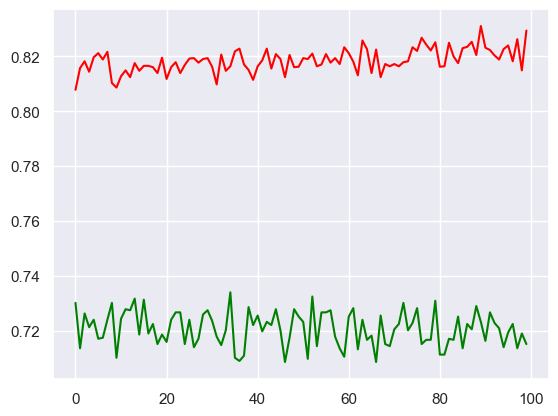

In [241]:
# visualize the loss and accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='green')

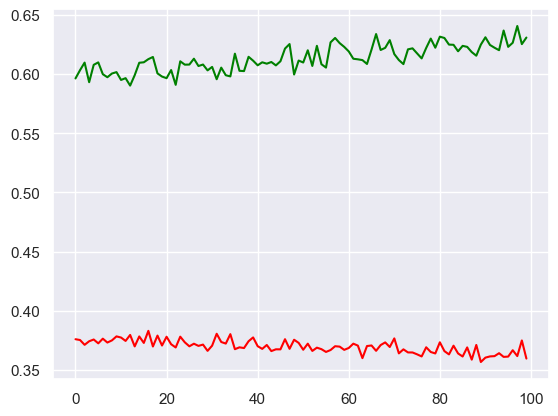

In [242]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')

## Random Forest is the real winner

In [76]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 30,max_depth = None, min_samples_leaf=  3, min_samples_split= 10)
md3 = rf.fit(xTrain,yTrain)
pred3 = md3.predict(xTest)
acc3 = accuracy_score(pred3,yTest)



## Evaluation

In [77]:
print('Test SCore: ', acc3)
print('Train SCore: ', accuracy_score(md3.predict(xTrain),yTrain))

Test SCore:  0.7617397998460355
Train SCore:  0.8338832068624217


In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [79]:
classification_train = classification_report(md3.predict(xTrain),yTrain)
classification_test = classification_report(md3.predict(xTest),yTest)
print('Train\n', classification_train)
print('Test\n', classification_test)

Train
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      3333
           1       0.78      0.88      0.83      2729

    accuracy                           0.83      6062
   macro avg       0.83      0.84      0.83      6062
weighted avg       0.84      0.83      0.83      6062

Test
               precision    recall  f1-score   support

           0       0.84      0.73      0.78      1535
           1       0.68      0.80      0.73      1063

    accuracy                           0.76      2598
   macro avg       0.76      0.77      0.76      2598
weighted avg       0.77      0.76      0.76      2598



In [81]:
confusion_matrix_train = confusion_matrix(md3.predict(xTrain),yTrain)
confusion_matrix_test = confusion_matrix(md3.predict(xTest),yTest)
print('Train\n', confusion_matrix_train)
print('Test\n', confusion_matrix_test)

Train
 [[2652  681]
 [ 326 2403]]
Test
 [[1126  409]
 [ 210  853]]


In [89]:
import pickle
pickle.dump(md3,open('rf_model_75%acc','wb'))

In [68]:
import joblib
model = joblib.load('rf_model_75%acc')

## Predict the test dataset

In [92]:
df4[df4['model'] == 'test']

,CryoSleep,Age,VIP,cabin_num,cabin_side,total_billed_amt,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_T,Transported,model
0,1,27.0,0,3,0,0.0,0,0,1,0,0,0,0,0,0,NaN,test
1,0,19.0,0,4,0,2832.0,0,0,1,0,0,0,0,1,0,NaN,test
2,1,31.0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,NaN,test
3,0,38.0,0,1,0,7418.0,0,0,1,0,1,0,0,0,0,NaN,test
4,0,20.0,0,5,0,645.0,0,0,1,0,0,0,0,1,0,NaN,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,1496,0,0.0,0,0,1,0,0,0,0,0,0,NaN,test
4273,0,42.0,0,82,0,1018.0,0,0,1,0,0,0,0,1,0,NaN,test
4274,1,27.0,0,296,1,0.0,1,0,0,0,0,1,0,0,0,NaN,test
4275,0,27.0,0,297,1,3203.0,0,0,1,0,0,1,0,0,0,NaN,test


In [70]:
actual_pred = md3.predict(x_test)

In [71]:
final = pd.DataFrame(actual_pred,columns = ['prediction'])

In [72]:
final.shape

(4277, 1)

In [79]:
final = final.set_index(['PassengerId'])

In [80]:
final

,prediction
PassengerId,
0001_01,1
0002_01,0
0003_01,0
0003_02,0
0004_01,0
...,...
4549_01,1
4550_01,0
4552_01,1


In [82]:
def pred(num):
    if num == 0:
        return False
    else:
        return True
final['Transported'] = final['prediction'].apply(pred)

In [85]:
final.drop(columns = ['prediction'],inplace = True)

In [135]:
new_df.reset_index(drop=True)['PassengerId']


0        0001_01
1        0002_01
2        0003_01
3        0003_02
4        0004_01
          ...   
12965    9266_02
12966    9269_01
12967    9271_01
12968    9273_01
12969    9277_01
Name: PassengerId, Length: 12970, dtype: object

In [145]:
#final.to_csv('titanic_submission.csv')

In [146]:
final

,PassengerId,Transported
0,0001_01,False
1,0002_01,False
2,0003_01,False
3,0003_02,False
4,0004_01,False
...,...,...
4272,4549_01,False
4273,4550_01,False
4274,4552_01,False
4275,4553_01,False


In [148]:
final.set_index('PassengerId', inplace=True)


In [86]:
final.to_csv('titanic_submission.csv')

In [68]:
from ydata_profiling import ProfileReport

In [149]:
profile = ProfileReport(df4, title='Pandas Profiling Report', explorative=True, correlations={"pearson": {"calculate": True}})
profile

In [150]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [127]:
pf = ProfileReport(new_df)
pf.to_file(output_file = 'report1.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]